DATA LOADING AND INSPECTION
-------------

In [1]:
#Importing libraries

#Packages for numeric
import pandas as pd
import numpy as np

#Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, accuracy_score,log_loss# performance metrics
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler


#Classifier module
from sklearn.neighbors import KNeighborsClassifier


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data.
telecom = pd.read_csv('tele-churn.csv')

Data Preprocessing
------------
Encoding
--------

In [3]:
# Removing the phone number and state column
df1 = telecom.drop(['phone number', 'state', 'area code'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})

FEATURES SCALING / STANDARDIZATION
---------------

In [4]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

In [5]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Check the shapes of the split dataprint("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Train set size:", y_train.shape)
print("Test set size:", y_test.shape)

Test set size: (600, 17)
Train set size: (2733,)
Test set size: (600,)


SMOTE
---------

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Resample the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (4676, 17)

Value counts of y_train_resampled:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


DATA MODELING¶
------------
DECISION TREE CLASSIFIER
-------------

In [7]:
#Initialize the Gradient Boosting model
knn =  KNeighborsClassifier ()

#Train the model
knn.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_knn = knn.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
auc_roc = roc_auc_score(y_test, y_pred_knn)
print(f"KNeighbors Classifier Accuracy: {accuracy :.4f}")
print(f"KNeighbors Classifier Precision: {precision :.4f}")
print(f"KNeighbors Classifier recall: {recall :.4f}")
print(f"KNeighbors Classifier f1_score: {f1 :.4f}")
print(f"KNeighbors Classifier auc_roc: {auc_roc :.4f}")
print(classification_report(y_test, y_pred_knn))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

print ("KNeighbors Classifier")
print("Training Accuracy :", knn.score(X_train, y_train))
print("Training Resampled Accuracy :", knn.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", knn.score(X_test, y_test))

KNeighbors Classifier Accuracy: 0.8033
KNeighbors Classifier Precision: 0.4085
KNeighbors Classifier recall: 0.7614
KNeighbors Classifier f1_score: 0.5317
KNeighbors Classifier auc_roc: 0.7860
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.88       512
         1.0       0.41      0.76      0.53        88

    accuracy                           0.80       600
   macro avg       0.68      0.79      0.70       600
weighted avg       0.87      0.80      0.83       600

Confusion Matrix:
 [[415  97]
 [ 21  67]]
ROC AUC Score: 0.8526611328125
KNeighbors Classifier
Training Accuracy : 0.8880351262349067
Training Resampled Accuracy : 0.9341317365269461
Testing Accuracy : 0.8033333333333333


CONFUSION MATRIX 
----------------------

In [8]:
y_pred_knn = knn.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_knn).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 67
False positives: 97
True negatives: 415
False negatives: 21



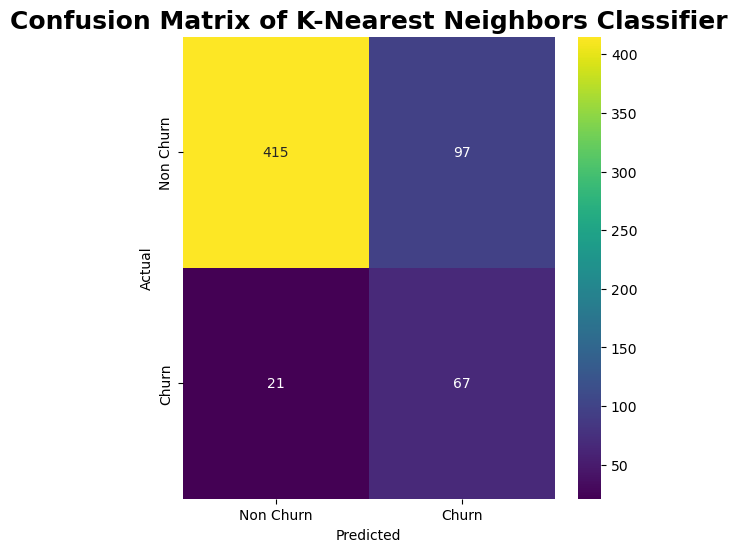

In [9]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of K-Nearest Neighbors Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

EVALUATION OF THE MACHINE LEARNING ALGORITHMS
------------------

In [10]:
final_data = pd.DataFrame({"ALGORITHMS":["-Nearest Neighbors Classifier"], 
                           "ACCURACY":[accuracy_score(y_test, y_pred_knn)*100],
                         "PRECISION":[precision_score(y_test, y_pred_knn)*100],
                          "RECALL":[recall_score(y_test, y_pred_knn)*100],
                          "F1_SCORE":[f1_score(y_test, y_pred_knn)*100], 
                            "ROC_AUC":[roc_auc_score(y_test, y_pred_knn)*100], 
                           
                        })

final_data

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC
0,-Nearest Neighbors Classifier,80.333333,40.853659,76.136364,53.174603,78.595526


K_FOLD CROSS VALIDATION
------------

ACCURACY
--------

In [11]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
knn_accuracies = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(knn_accuracies)
knn_avg_accuracy = np.mean(knn_accuracies)
knn_std_accuracy = np.std(knn_accuracies)
print(f"The std score of cross validation using K-Nearest Neighbors Classifier algorithm is {knn_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using K-Nearest Neighbors Classifier algorithm is {knn_avg_accuracy * 100:.2f}%")

[0.92521368 0.88675214 0.90598291 0.89316239 0.89316239 0.90384615
 0.9143469  0.90149893 0.91006424 0.91220557]
The std score of cross validation using K-Nearest Neighbors Classifier algorithm is 1.10%
The mean score of cross validation using K-Nearest Neighbors Classifier algorithm is 90.46%


PRECISON
----

In [12]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

knn_precision = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(knn_precision)
knn_avg_precision = np.mean(knn_precision)
knn_std_precision = np.std(knn_precision)
print(f"The std score of cross validation using K-Nearest Neighbors Classifier algorithm is {knn_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using K-Nearest Neighbors Classifier algorithm is {knn_avg_precision * 100:.2f}%")

[0.878327   0.81978799 0.84926471 0.83333333 0.83093525 0.84870849
 0.85608856 0.84       0.85036496 0.85608856]
The std score of cross validation using K-Nearest Neighbors Classifier algorithm is 1.55%
The mean score of cross validation using K-Nearest Neighbors Classifier algorithm is 84.63%


RECALL
---

In [13]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

knn_recall = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(knn_recall)
knn_avg_recall = np.mean(knn_recall)
knn_std_recall = np.std(knn_recall)
print(f"The std score of cross validation using K-Nearest Neighbors Classifier algorithm is {knn_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using K-Nearest Neighbors Classifier algorithm is {knn_avg_recall * 100:.2f}%")

[0.98717949 0.99145299 0.98717949 0.98290598 0.98717949 0.98290598
 0.99570815 0.99141631 0.9957265  0.99145299]
The std score of cross validation using K-Nearest Neighbors Classifier algorithm is 0.44%
The mean score of cross validation using K-Nearest Neighbors Classifier algorithm is 98.93%


F1_SCORE
------

In [14]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

knn_f1 = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(knn_f1)
knn_avg_f1 = np.mean(knn_f1)
knn_std_f1 = np.std(knn_f1)
print(f"The std score of cross validation using K-Nearest Neighbors Classifier algorithm is {knn_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using K-Nearest Neighbors Classifier algorithm is {knn_avg_f1 * 100:.2f}%")

[0.98717949 0.99145299 0.98717949 0.98290598 0.98717949 0.98290598
 0.99570815 0.99141631 0.9957265  0.99145299]
The std score of cross validation using K-Nearest Neighbors Classifier algorithm is 0.44%
The mean score of cross validation using K-Nearest Neighbors Classifier algorithm is 98.93%


CHECKING IF IT IS OVERFITTING OR NOT
-----------

In [15]:
#DecisionTreeClassifier

if knn_avg_accuracy > accuracy:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test accuracy")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test accuracy")

Model generalizes well: Cross_validation accuracy is higher or close to test accuracy


In [16]:
#DecisionTreeClassifier

if knn_avg_precision > precision:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test precision")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test precision")

Model generalizes well: Cross_validation accuracy is higher or close to test precision


In [17]:
#DecisionTreeClassifier

if knn_avg_recall > recall:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test recall")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test recall")

Model generalizes well: Cross_validation accuracy is higher or close to test recall


In [18]:
#DecisionTreeClassifier

if knn_avg_f1 > f1:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test f1_score")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test f1_score")

Model generalizes well: Cross_validation accuracy is higher or close to test f1_score


TOTAL AVERAGE KFOLD
--------------

In [19]:
final_kfold = pd.DataFrame({"ALGORITHMS":["K-Nearest Neighbors Classifier"], 
                           "ACCURACY":[knn_avg_accuracy * 100],
                         "PRECISION":[knn_avg_precision * 100],
                          "RECALL":[knn_avg_recall * 100],
                          "F1_SCORE":[knn_avg_f1 * 100],  
                           
                        })

final_kfold

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE
0,K-Nearest Neighbors Classifier,90.462353,84.628988,98.931074,98.931074
